### ***1. Use the DecisionTree Classifier from sklearn library on a dataset of your choice to demonstrate its working. Use a dataset to allow for both gini index based approach and entropy based approach and visualize the resulting decision trees. ***

***A. IRIS DATASET***

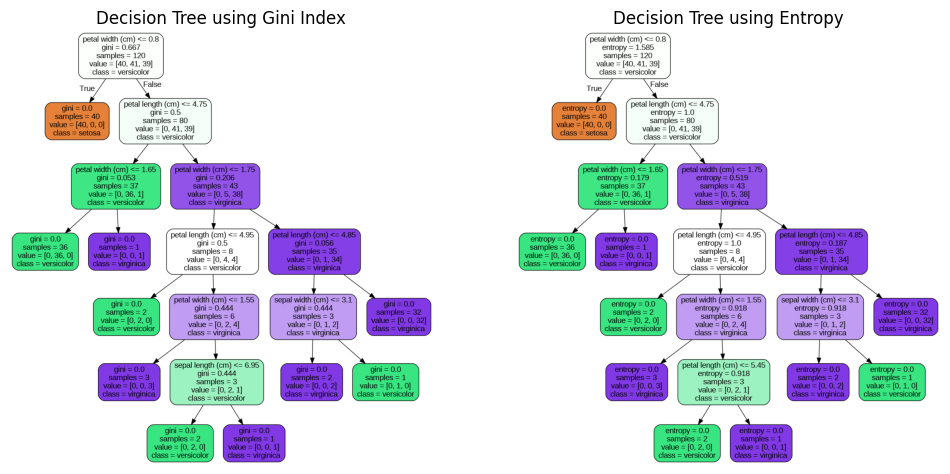

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
import matplotlib.pyplot as plt

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit DecisionTree Classifier using Gini Index
clf_gini = DecisionTreeClassifier(criterion='gini')
clf_gini.fit(X_train, y_train)

# Fit DecisionTree Classifier using Entropy
clf_entropy = DecisionTreeClassifier(criterion='entropy')
clf_entropy.fit(X_train, y_train)

# Visualize resulting decision trees
dot_data_gini = export_graphviz(clf_gini, out_file=None, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True)
graph_gini = graphviz.Source(dot_data_gini)

dot_data_entropy = export_graphviz(clf_entropy, out_file=None, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True)
graph_entropy = graphviz.Source(dot_data_entropy)

# Save decision tree visualization as PNG files
graph_gini.render('decision_tree_gini', format='png', cleanup=True)
graph_entropy.render('decision_tree_entropy', format='png', cleanup=True)

# Display decision tree visualizations
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Decision Tree using Gini Index')
plt.imshow(plt.imread('decision_tree_gini.png'))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Decision Tree using Entropy')
plt.imshow(plt.imread('decision_tree_entropy.png'))
plt.axis('off')

plt.show()


***B. WINE DATASET***

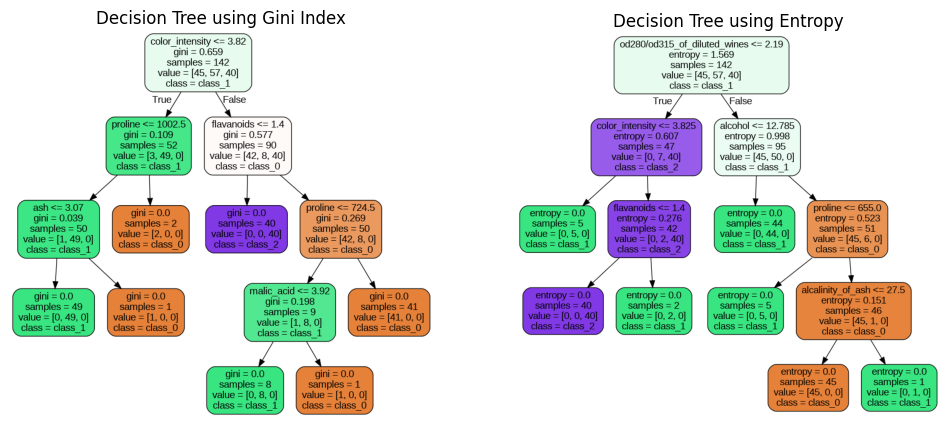

In [3]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
import matplotlib.pyplot as plt

# Load dataset
wine = load_wine()
X = wine.data
y = wine.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit DecisionTree Classifier using Gini Index
clf_gini = DecisionTreeClassifier(criterion='gini')
clf_gini.fit(X_train, y_train)

# Fit DecisionTree Classifier using Entropy
clf_entropy = DecisionTreeClassifier(criterion='entropy')
clf_entropy.fit(X_train, y_train)

# Visualize resulting decision trees
dot_data_gini = export_graphviz(clf_gini, out_file=None, feature_names=wine.feature_names, class_names=wine.target_names, filled=True, rounded=True)
graph_gini = graphviz.Source(dot_data_gini)

dot_data_entropy = export_graphviz(clf_entropy, out_file=None, feature_names=wine.feature_names, class_names=wine.target_names, filled=True, rounded=True)
graph_entropy = graphviz.Source(dot_data_entropy)

# Save decision tree visualization as PNG files
graph_gini.render('decision_tree_gini', format='png', cleanup=True)
graph_entropy.render('decision_tree_entropy', format='png', cleanup=True)

# Display decision tree visualizations
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Decision Tree using Gini Index')
plt.imshow(plt.imread('decision_tree_gini.png'))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Decision Tree using Entropy')
plt.imshow(plt.imread('decision_tree_entropy.png'))
plt.axis('off')

plt.show()


### ***2. Create a decision tree without using sklearn library, just using the concept of entropy and choose what node will be the root, and subsequent decision parameters based on information gain. Show all calculations.***

***A. SAMPLE SET***

***Data point 1: Features [2, 3], Target label 0***

***Data point 2: Features [2, 4], Target label 0***

***Data point 3: Features [3, 2], Target label 1***

***Data point 4: Features [4, 1], Target label 1***

***Data point 5: Features [5, 4], Target label 0***

In [37]:
import numpy as np

class DecisionTree:
    def __init__(self):
        self.tree = None

    def entropy(self, y):
        """
        Calculate entropy of a list of class labels.
        """
        _, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        entropy = -np.sum(probabilities * np.log2(probabilities))
        return entropy

    def information_gain(self, X, y, feature_idx, threshold):
        """
        Calculate information gain of a split on a feature at a given threshold.
        """
        left_indices = np.where(X[:, feature_idx] <= threshold)
        right_indices = np.where(X[:, feature_idx] > threshold)

        left_y = y[left_indices]
        right_y = y[right_indices]

        left_entropy = self.entropy(left_y)
        right_entropy = self.entropy(right_y)
        entropy_after_split = (len(left_y) / len(y)) * left_entropy + (len(right_y) / len(y)) * right_entropy
        information_gain = self.entropy(y) - entropy_after_split

        return information_gain

    def find_best_split(self, X, y):
        """
        Find the best feature and threshold for the next split.
        """
        best_gain = 0
        best_feature = None
        best_threshold = None
        n_features = X.shape[1]

        for feature_idx in range(n_features):
            thresholds = np.unique(X[:, feature_idx])
            for threshold in thresholds:
                gain = self.information_gain(X, y, feature_idx, threshold)
                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature_idx
                    best_threshold = threshold

        return best_feature, best_threshold

    def build_tree(self, X, y, depth=0, max_depth=5):
        """
        Recursively build the decision tree.
        """
        if depth >= max_depth or len(np.unique(y)) == 1:
            leaf_value = np.argmax(np.bincount(y))
            return leaf_value

        best_feature, best_threshold = self.find_best_split(X, y)
        left_indices = np.where(X[:, best_feature] <= best_threshold)
        right_indices = np.where(X[:, best_feature] > best_threshold)

        left_subtree = self.build_tree(X[left_indices], y[left_indices], depth + 1, max_depth)
        right_subtree = self.build_tree(X[right_indices], y[right_indices], depth + 1, max_depth)

        return {'feature': best_feature, 'threshold': best_threshold,
                'left': left_subtree, 'right': right_subtree}

    def fit(self, X, y):
        self.tree = self.build_tree(X, y)

    def predict_instance(self, instance, tree):
        if isinstance(tree, dict):
            feature_idx, threshold = tree['feature'], tree['threshold']
            if instance[feature_idx] <= threshold:
                return self.predict_instance(instance, tree['left'])
            else:
                return self.predict_instance(instance, tree['right'])
        else:
            return tree

    def predict(self, X):
        predictions = []
        for instance in X:
            predictions.append(self.predict_instance(instance, self.tree))
        return np.array(predictions)

    def print_tree(self, tree, depth=0):
        if isinstance(tree, dict):
            print('  ' * depth + f"Feature {tree['feature']} <= {tree['threshold']}")
            self.print_tree(tree['left'], depth + 1)
            self.print_tree(tree['right'], depth + 1)
        else:
            print('  ' * depth + f"Predict {tree}")

# Example usage:
X = np.array([[2, 3],
              [2, 4],
              [3, 2],
              [4, 1],
              [5, 4]])
y = np.array([0, 0, 1, 1, 0])

tree = DecisionTree()
tree.fit(X, y)

print("Predictions:", tree.predict(X))
print("Tree structure:")
tree.print_tree(tree.tree)


Predictions: [0 0 1 1 0]
Tree structure:
Feature 1 <= 2
  Predict 1
  Predict 0


***B. CRICKET***

| Outlook   | Temperature | Humidity | Wind    | PlayCricket |
|-----------|-------------|----------|---------|-------------|
| Sunny     | Hot         | High     | Weak    | No          |
| Sunny     | Hot         | High     | Strong  | No          |
| Overcast  | Hot         | High     | Weak    | Yes         |
| Rain      | Mild        | High     | Weak    | Yes         |
| Rain      | Cool        | Normal   | Weak    | Yes         |
| Rain      | Cool        | Normal   | Strong  | No          |
| Overcast  | Cool        | Normal   | Strong  | Yes         |
| Sunny     | Mild        | High     | Weak    | No          |
| Sunny     | Cool        | Normal   | Weak    | Yes         |
| Rain      | Mild        | Normal   | Weak    | Yes         |


In [25]:
from collections import Counter
import numpy as np
from graphviz import Digraph
from sklearn.preprocessing import LabelEncoder

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value  # For leaf nodes, the class label

def entropy(y):
    """
    Calculate entropy of a list of class labels.
    """
    counts = np.bincount(y)
    probabilities = counts / len(y)
    entropy = -np.sum([p * np.log2(p) for p in probabilities if p > 0])
    return entropy

def information_gain(X, y, feature, threshold):
    """
    Calculate information gain of a split on a feature at a given threshold.
    """
    left_indices = np.where(X[:, feature] <= threshold)
    right_indices = np.where(X[:, feature] > threshold)

    left_y = y[left_indices]
    right_y = y[right_indices]

    left_entropy = entropy(left_y)
    right_entropy = entropy(right_y)
    entropy_after_split = (len(left_y) / len(y)) * left_entropy + (len(right_y) / len(y)) * right_entropy
    information_gain = entropy(y) - entropy_after_split

    return information_gain

def find_best_split(X, y):
    """
    Find the best feature and threshold for the next split.
    """
    best_gain = 0
    best_feature = None
    best_threshold = None
    n_features = X.shape[1]

    for feature in range(n_features):
        thresholds = np.unique(X[:, feature])
        for threshold in thresholds:
            gain = information_gain(X, y, feature, threshold)
            if gain > best_gain:
                best_gain = gain
                best_feature = feature
                best_threshold = threshold

    return best_feature, best_threshold

def build_tree(X, y, depth=0, max_depth=5):
    """
    Recursively build the decision tree.
    """
    if depth >= max_depth or len(set(y)) == 1:
        leaf_value = Counter(y).most_common(1)[0][0]
        return Node(value=leaf_value)

    best_feature, best_threshold = find_best_split(X, y)
    left_indices = np.where(X[:, best_feature] <= best_threshold)
    right_indices = np.where(X[:, best_feature] > best_threshold)

    left_subtree = build_tree(X[left_indices], y[left_indices], depth + 1, max_depth)
    right_subtree = build_tree(X[right_indices], y[right_indices], depth + 1, max_depth)

    return Node(feature=best_feature, threshold=best_threshold, left=left_subtree, right=right_subtree)

def visualize_tree(tree, feature_names, class_names, filename='decision_tree'):
    """
    Visualize the decision tree using Graphviz.
    """
    dot = Digraph()

    def add_nodes(node, parent=None):
        if node.feature is None:
            label = class_names[node.value]
        else:
            label = f"{feature_names[node.feature]}\n<= {node.threshold:.2f}"
        dot.node(str(node), label=label)

        if parent is not None:
            dot.edge(str(parent), str(node))

        if node.left is not None:
            add_nodes(node.left, parent=node)

        if node.right is not None:
            add_nodes(node.right, parent=node)

    add_nodes(tree)
    dot.render(filename, format='png', cleanup=True)

# Define the dataset
X = np.array([
    ['Sunny', 'Hot', 'High', 'Weak'],
    ['Sunny', 'Hot', 'High', 'Strong'],
    ['Overcast', 'Hot', 'High', 'Weak'],
    ['Rain', 'Mild', 'High', 'Weak'],
    ['Rain', 'Cool', 'Normal', 'Weak'],
    ['Rain', 'Cool', 'Normal', 'Strong'],
    ['Overcast', 'Cool', 'Normal', 'Strong'],
    ['Sunny', 'Mild', 'High', 'Weak'],
    ['Sunny', 'Cool', 'Normal', 'Weak'],
    ['Rain', 'Mild', 'Normal', 'Weak']
])

y = np.array(['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes'])

# Convert categorical features to numerical labels
label_encoders = []
for i in range(X.shape[1]):
    le = LabelEncoder()
    X[:, i] = le.fit_transform(X[:, i])
    label_encoders.append(le)

# Encode class labels into numerical values
le = LabelEncoder()
y = le.fit_transform(y)

# Define feature names
feature_names = ['Outlook', 'Temperature', 'Humidity', 'Wind']

# Build the decision tree
tree = build_tree(X.astype(float), y)

# Visualize the decision tree
visualize_tree(tree, feature_names, le.classes_)


In [29]:
from collections import Counter
import numpy as np
from graphviz import Digraph
from sklearn.preprocessing import LabelEncoder

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value  # For leaf nodes, the class label

def entropy(y):
    """
    Calculate entropy of a list of class labels.
    """
    counts = np.bincount(y)
    probabilities = counts / len(y)
    entropy = -np.sum([p * np.log2(p) for p in probabilities if p > 0])
    return entropy

def information_gain(X, y, feature, threshold):
    """
    Calculate information gain of a split on a feature at a given threshold.
    """
    left_indices = np.where(X[:, feature] <= threshold)
    right_indices = np.where(X[:, feature] > threshold)

    left_y = y[left_indices]
    right_y = y[right_indices]

    left_entropy = entropy(left_y)
    right_entropy = entropy(right_y)
    entropy_after_split = (len(left_y) / len(y)) * left_entropy + (len(right_y) / len(y)) * right_entropy
    information_gain = entropy(y) - entropy_after_split

    return information_gain

def find_best_split(X, y):
    """
    Find the best feature and threshold for the next split.
    """
    best_gain = 0
    best_feature = None
    best_threshold = None
    n_features = X.shape[1]

    for feature in range(n_features):
        thresholds = np.unique(X[:, feature])
        for threshold in thresholds:
            gain = information_gain(X, y, feature, threshold)
            if gain > best_gain:
                best_gain = gain
                best_feature = feature
                best_threshold = threshold

    return best_feature, best_threshold

def build_tree(X, y, depth=0, max_depth=5):
    """
    Recursively build the decision tree.
    """
    if depth >= max_depth or len(set(y)) == 1:
        leaf_value = Counter(y).most_common(1)[0][0]
        return Node(value=leaf_value)

    best_feature, best_threshold = find_best_split(X, y)
    left_indices = np.where(X[:, best_feature] <= best_threshold)
    right_indices = np.where(X[:, best_feature] > best_threshold)

    left_subtree = build_tree(X[left_indices], y[left_indices], depth + 1, max_depth)
    right_subtree = build_tree(X[right_indices], y[right_indices], depth + 1, max_depth)

    return Node(feature=best_feature, threshold=best_threshold, left=left_subtree, right=right_subtree)

def visualize_tree(tree, feature_names, class_names, filename='decision_tree'):
    """
    Visualize the decision tree using Graphviz.
    """
    dot = Digraph()

    def add_nodes(node, parent=None):
        if node.feature is None:
            label = class_names[node.value]
        else:
            label = f"{feature_names[node.feature]}\n<= {node.threshold:.2f}"
        dot.node(str(node), label=label)

        if parent is not None:
            dot.edge(str(parent), str(node))

        if node.left is not None:
            add_nodes(node.left, parent=node)

        if node.right is not None:
            add_nodes(node.right, parent=node)

    add_nodes(tree)
    dot.render(filename, format='png', cleanup=True)

def print_tree(node, depth=0):
    """
    Print the decision tree structure.
    """
    indent = "  " * depth
    if node.feature is None:
        print(f"{indent}Predict: {node.value}")
    else:
        print(f"{indent}{feature_names[node.feature]} <= {node.threshold}")
        print_tree(node.left, depth + 1)
        print_tree(node.right, depth + 1)

# Define the dataset
X = np.array([
    ['Sunny', 'Hot', 'High', 'Weak'],
    ['Sunny', 'Hot', 'High', 'Strong'],
    ['Overcast', 'Hot', 'High', 'Weak'],
    ['Rain', 'Mild', 'High', 'Weak'],
    ['Rain', 'Cool', 'Normal', 'Weak'],
    ['Rain', 'Cool', 'Normal', 'Strong'],
    ['Overcast', 'Cool', 'Normal', 'Strong'],
    ['Sunny', 'Mild', 'High', 'Weak'],
    ['Sunny', 'Cool', 'Normal', 'Weak'],
    ['Rain', 'Mild', 'Normal', 'Weak']
])

y = np.array(['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes'])

# Convert categorical features to numerical labels
label_encoders = []
for i in range(X.shape[1]):
    le = LabelEncoder()
    X[:, i] = le.fit_transform(X[:, i])
    label_encoders.append(le)

# Encode class labels into numerical values
le = LabelEncoder()
y = le.fit_transform(y)

# Define feature names
feature_names = ['Outlook', 'Temperature', 'Humidity', 'Wind']

# Build the decision tree
tree = build_tree(X.astype(float), y)

# Print the decision tree
print_tree(tree)

# Visualize the decision tree
visualize_tree(tree, feature_names, le.classes_)




Outlook <= 1.0
  Wind <= 0.0
    Outlook <= 0.0
      Predict: 1
      Predict: 0
    Predict: 1
  Temperature <= 0.0
    Predict: 1
    Predict: 0


### ***3. Show how decision trees can be used for both classification and regression using a program with sample dataset. Also visualize the decision tree obtained***

***A. Classification example using the Iris dataset:***

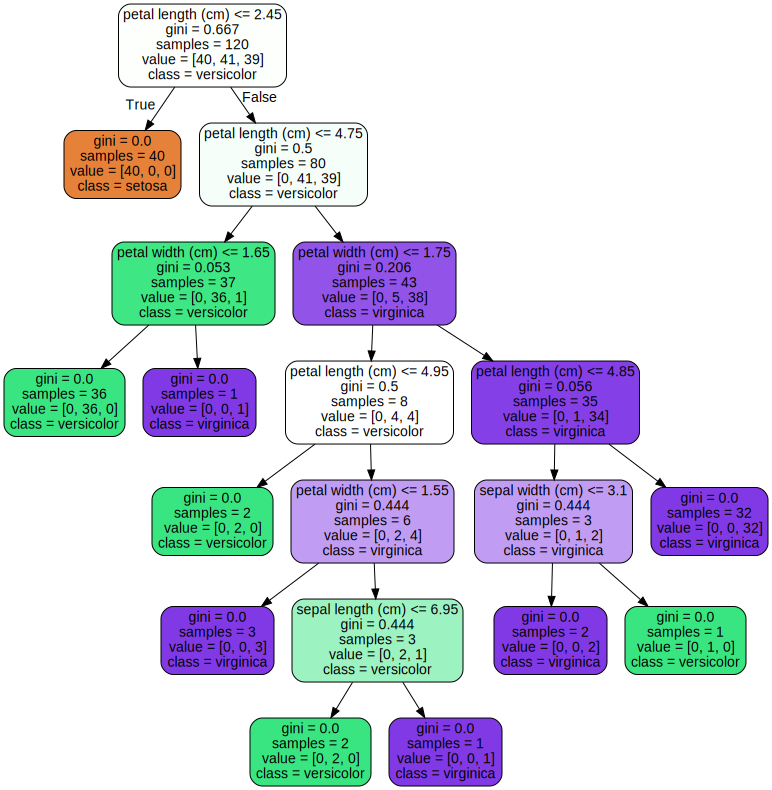

In [31]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Visualize the decision tree
dot_data = export_graphviz(clf, out_file=None, feature_names=iris.feature_names,
                           class_names=iris.target_names, filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph.render("iris_decision_tree", format="png", cleanup=True)
graph


***B. Regression example using the Boston Housing dataset***

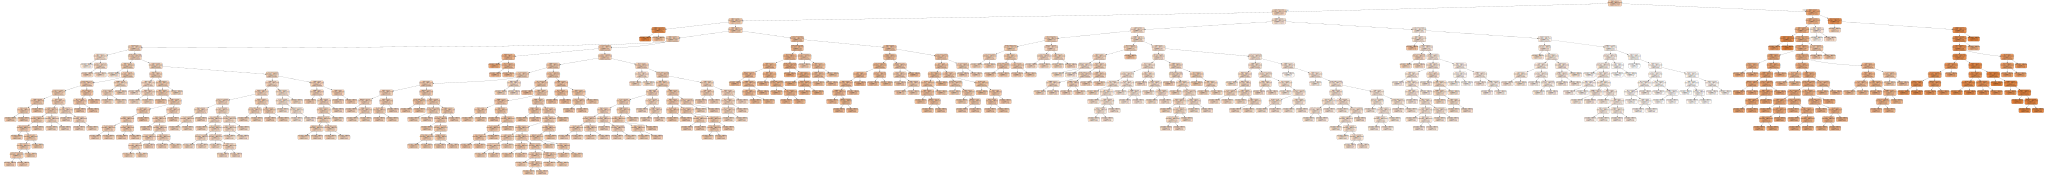

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import graphviz

# Load the Boston housing dataset from the original source
boston_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
boston_data = pd.read_csv(boston_url, delimiter='\s+', names=column_names)

# Prepare the data
X = boston_data.drop('MEDV', axis=1).values
y = boston_data['MEDV'].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a decision tree regressor
reg = DecisionTreeRegressor()
reg.fit(X_train, y_train)

# Visualize the decision tree
dot_data = export_graphviz(reg, out_file=None, feature_names=column_names[:-1],
                           filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph.render("boston_housing_decision_tree", format="png", cleanup=True)
graph
